# Spotify Popularity Predictor (39%)

The goal of this challenge is to create a model that predicts the popularity of a song based on its features.

The dataset contains a list of tracks with the following characteristics:
- `acousticness`: whether the track is acoustic
- `danceability`: describes how suitable a track is for dancing
- `duration_ms`: duration of the track in milliseconds
- `energy`: represents a perceptual measure of intensity and activity
- `explicit`: whether the track has explicit lyrics
- `id`: id for the track
- `instrumentalness`: predicts whether a track contains no vocals
- `key`: the key the track is in
- `liveness`: detects the presence of an audience in the recording
- `loudness`: the overall loudness of a track in decibels
- `mode`: modality of a track
- `name`: name of the track
- `popularity`: popularity of the track
- `release_date`: release date
- `speechiness`: detects the presence of spoken words in a track
- `tempo`: overall estimated tempo of a track in beats per minute
- `valence`: describes the musical positiveness conveyed by a track
- `artist`: artist who performed the track

# Model

## Data collection

**📝 Load the `spotify_popularity_train.csv` dataset from the provided URL. Display the first few rows. Perform the usual cleaning operations. Store the result in a `DataFrame` named `data`.**

👉 Do not forget to clean the dataset

In [1]:
url = "https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/spotify_popularity_train.csv"

In [2]:
import pandas as pd
data = pd.read_csv(url)
data2 = pd.read_csv(url)
data.head(3)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.65400,0.499,219827,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.00409,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.460,0.4300,John Hartford
1,0.00592,0.439,483948,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.14000,2,0.0890,-8.497,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.0677,138.040,0.0587,Driftmoon
2,0.73400,0.523,245693,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.00000,0,0.0771,-11.506,1,I'm The Greatest Star,40,1968-09-01,0.2140,75.869,0.4640,Barbra Streisand


👉 **Drop duplicates**

In [3]:
data.shape

(52317, 18)

In [4]:
data = data.drop_duplicates()

In [5]:
data.shape

(52057, 18)

👉 **Missing values**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52057 entries, 0 to 52316
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      52057 non-null  float64
 1   danceability      52057 non-null  float64
 2   duration_ms       52057 non-null  int64  
 3   energy            52057 non-null  float64
 4   explicit          52057 non-null  int64  
 5   id                52057 non-null  object 
 6   instrumentalness  52057 non-null  float64
 7   key               52057 non-null  int64  
 8   liveness          52057 non-null  float64
 9   loudness          52057 non-null  float64
 10  mode              52057 non-null  int64  
 11  name              52057 non-null  object 
 12  popularity        52057 non-null  int64  
 13  release_date      52057 non-null  object 
 14  speechiness       52057 non-null  float64
 15  tempo             52057 non-null  float64
 16  valence           52057 non-null  float6

In [7]:
data = data.dropna()

In [8]:
data.shape

(52053, 18)

👉 **Outliers**

In [9]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
count,52053.000000,52053.000000,5.205300e+04,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000
mean,0.498218,0.536523,2.324970e+05,0.483881,0.069698,0.195664,5.191536,0.211833,-11.745365,0.705665,25.815188,0.106189,117.077248,0.524738
std,0.379814,0.176418,1.433212e+05,0.273028,0.254640,0.333686,3.526759,0.180351,5.696061,0.455747,21.864219,0.182825,30.266286,0.263819
min,0.000000,0.000000,5.991000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.086700,0.413000,1.664000e+05,0.249000,0.000000,0.000000,2.000000,0.099500,-14.913000,0.000000,1.000000,0.035200,94.004000,0.312000
50%,0.516000,0.548000,2.062130e+05,0.468000,0.000000,0.000469,5.000000,0.139000,-10.836000,1.000000,26.000000,0.045700,115.939000,0.538000
75%,0.893000,0.669000,2.662540e+05,0.713000,0.000000,0.240000,8.000000,0.273000,-7.478000,1.000000,42.000000,0.076800,135.114000,0.742000
max,0.996000,0.986000,4.800118e+06,1.000000,1.000000,1.000000,11.000000,0.999000,3.744000,1.000000,96.000000,0.970000,243.507000,1.000000


No particular outlier

👉 **Scaling**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='key', ylabel='Count'>

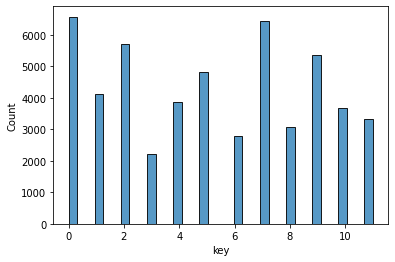

In [11]:
sns.histplot(data=data, x='key')

Pas de distribution normale partout (et les valeurs de beaucoup de features sont entre 0 et 1) >>> MinMaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale = ['duration_ms', 'key', 'loudness', 'tempo']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [13]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
count,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000,52053.000000
mean,0.498218,0.536523,0.047247,0.483881,0.069698,0.195664,0.471958,0.211833,0.757007,0.705665,25.815188,0.106189,0.480796,0.524738
std,0.379814,0.176418,0.029895,0.273028,0.254640,0.333686,0.320614,0.180351,0.089358,0.455747,21.864219,0.182825,0.124293,0.263819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.086700,0.413000,0.033459,0.249000,0.000000,0.000000,0.181818,0.099500,0.707314,0.000000,1.000000,0.035200,0.386042,0.312000
50%,0.516000,0.548000,0.041764,0.468000,0.000000,0.000469,0.454545,0.139000,0.771273,1.000000,26.000000,0.045700,0.476122,0.538000
75%,0.893000,0.669000,0.054288,0.713000,0.000000,0.240000,0.727273,0.273000,0.823952,1.000000,42.000000,0.076800,0.554867,0.742000
max,0.996000,0.986000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999000,1.000000,1.000000,96.000000,0.970000,1.000000,1.000000


👉 **Release date in year**

In [14]:
data['year'] = data['release_date'].map(lambda x: x[:4]).astype(int)
data = data.drop(columns='release_date')

In [15]:
data['year']

0        1971
1        2015
2        1968
3        1926
4        2008
         ... 
52312    1977
52313    1965
52314    2020
52315    1952
52316    1993
Name: year, Length: 52053, dtype: int64

### Save your results

Run the following cell to save your results.

In [16]:
from nbresult import ChallengeResult

ChallengeResult(
    "c5_data_cleaning",
    data=data).write()

## Baseline

**📝 We want to use a metric that measures the prediction error in the same unit than `popularity`. In addition, it should strongly penalize largest errors. Which sklearn's [metric](https://scikit-learn.org/stable/modules/model_evaluation.html) should we use? Store its exact name as string below**

On choisi la MSE pour pénaliser les grandes erreurs

In [17]:
scoring = "neg_mean_squared_error"

In [18]:
y_mean = data['popularity'].mean()
((data['popularity'] - y_mean.mean())**2).mean()

478.03488967164384

**📝 Let's build a baseline model using only the numerical features in our dataset.**
- Build `X_baseline` with only numerical features
- Build `y` your target containing the `popularity`
- Then 5 times cross validate the baseline linear model of your choice (do not fine tune it)
- Store your mean performance in a `float` variable named `baseline_score`

In [19]:
X_baseline = data.drop(columns=['popularity', 'id', 'name', 'year', 'artist']).copy()

In [20]:
y = data['popularity'].copy()

In [21]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate

In [22]:
baseline_model = DummyRegressor(strategy="median")
cv_results = cross_validate(baseline_model,X_baseline,y, cv=5, scoring=scoring)
baseline_score = cv_results['test_score'].mean()

In [23]:
baseline_score

-478.06912062179117

### Save your results

Run the following cell to save your results.

In [24]:
from nbresult import ChallengeResult

ChallengeResult(
    "baseline",
    scoring=scoring,
    baseline_score=baseline_score).write()

## Feature engineering

Let's now use the features that we left aside: `release_date` and `artist` to improve the performance of our model. We'll create them manually in a train vs. test context first (and pipeline them later)

### holdout
**📝 Create the 4 variables `X_train` `y_train`, `X_test`, `y_test` with a 50% split with random sampling**

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.5)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26026, 13), (26027, 13), (26026,), (26027,))

### year

**📝 Create `X_train_year` and `X_test_year` by adding the new column `year` containing the release year of the track as integer**

In [27]:
X_train_year = pd.concat([X_train, data['year']], axis=1, join='inner')
X_test_year = pd.concat([X_test, data['year']], axis=1, join='inner')

In [28]:
X_train_year.shape, X_test_year.shape

((26026, 14), (26027, 14))

### artist

How could we use the `artist` column? There are too many artists to one hot encode it.  
We could instead create an `artist_popularity` feature containing the mean popularity of an artist, computed as the mean popularity of all tracks the artist released _on the train set_.

#### Process artist popularity from the Training set

**📝 Compute and store the `artist_popularity` as a new pandas `Series`**  

In [29]:
artist_popularity = pd.concat([X_train, data[['artist', 'popularity']]],
                               axis=1,
                               join='inner').groupby(by='artist').mean()['popularity']

In [30]:
artist_popularity

artist
"Weird Al" Yankovic                             32.615385
$NOT                                            72.000000
*NSYNC                                          47.800000
-Sd-                                             0.000000
...And You Will Know Us by the Trail of Dead    36.000000
                                                  ...    
須田景凪                                            68.000000
高勝美                                             39.000000
黃品源                                             47.000000
김수철                                             24.000000
조정현                                             30.000000
Name: popularity, Length: 8435, dtype: float64

#### Apply the artist popularity to `X_train_year`

**📝 Create a new DataFrame `X_train_engineered` which adds a new column to the existing `X_train_year` with the `artist_popularity` corresponding to the song's artist.** 

🚨 Make sure that the target `popularity` does not end up in `X_train_engineered` 

In [31]:
X_train_engineered = pd.concat([X_train_year, data['artist']], axis=1, join='inner')\
                       .join(artist_popularity, on='artist')\
                       .rename(columns={"popularity": "artist_popularity"})\
                       .drop(columns='artist')

In [32]:
X_train_engineered.shape

(26026, 15)

In [33]:
X_train_engineered.head(2)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,artist_popularity
8221,0.000002,0.348,0.015563,0.875,0,0.00000,0.454545,0.287,0.852645,0,0.1620,0.537217,0.350,2018,15.090909
51821,0.440000,0.603,0.056020,0.302,0,0.00701,0.636364,0.172,0.726374,1,0.0242,0.309125,0.488,1982,45.250000


#### Apply the artist popularity to `X_test_year`

**📝 Similarily, create a new DataFrame `X_test_engineered` which also adds a new column to the existing `X_test_year` with the `artist_popularity` corresponding to the song's artist, computed from the training set.**

🚨**If an artist has never been seen in the training set, use the global mean popularity of all the tracks of `X_train`**

In [34]:
# Mean popularity of the train set
mean_train_popularity = y_train.mean()
mean_train_popularity

25.710981326365943

In [35]:
X_test_engineered = pd.concat([X_test_year, data['artist']], axis=1, join='inner')\
                        .join(artist_popularity, on='artist')\
                        .rename(columns={"popularity": "artist_popularity"})\
                        .drop(columns='artist')
X_test_engineered

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,artist_popularity
21408,0.0170,0.514,0.047054,0.7100,0,0.007000,0.181818,0.2900,0.757232,1,0.0316,0.661615,0.861,1988,40.750000
14550,0.1490,0.735,0.034615,0.2910,0,0.000221,0.727273,0.0694,0.750173,1,0.0446,0.466857,0.563,2018,36.000000
4200,0.0103,0.262,0.050133,0.8200,0,0.091400,0.636364,0.1010,0.758958,1,0.0428,0.637341,0.254,1990,37.600000
27411,0.1860,0.591,0.061847,0.8460,1,0.000000,0.636364,0.4630,0.883424,1,0.2760,0.389291,0.121,2009,59.935484
1707,0.9610,0.622,0.021306,0.9110,0,0.003530,0.181818,0.1140,0.908964,0,0.2050,0.470459,0.883,1948,2.923077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23532,0.0268,0.377,0.054524,0.7060,0,0.000007,0.000000,0.1320,0.836424,0,0.4850,0.313958,0.332,2019,0.000000
50850,0.8950,0.575,0.042234,0.1160,0,0.000196,0.000000,0.1870,0.619023,1,0.0293,0.456356,0.246,1976,34.727273
7181,0.9940,0.525,0.025130,0.0267,0,0.944000,0.909091,0.0993,0.501663,0,0.0500,0.482430,0.318,1944,NaN
8335,0.0437,0.515,0.039497,0.7100,0,0.002050,0.454545,0.3520,0.805974,1,0.0321,0.495530,0.943,1978,49.000000


In [36]:
X_test_engineered['artist_popularity'].fillna(mean_train_popularity, inplace=True)

In [37]:
X_test_engineered.head(3)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,artist_popularity
21408,0.0170,0.514,0.047054,0.710,0,0.007000,0.181818,0.2900,0.757232,1,0.0316,0.661615,0.861,1988,40.75
14550,0.1490,0.735,0.034615,0.291,0,0.000221,0.727273,0.0694,0.750173,1,0.0446,0.466857,0.563,2018,36.00
4200,0.0103,0.262,0.050133,0.820,0,0.091400,0.636364,0.1010,0.758958,1,0.0428,0.637341,0.254,1990,37.60


In [38]:
X_test_engineered.shape

(26027, 15)

### Save your results

Run the following cell to save your results.

In [39]:
from nbresult import ChallengeResult

_ = pd.concat([X_train_engineered, X_test_engineered])

ChallengeResult("c7_feature_engineering",
    shape = _.shape,
    cols = _.columns,
    years = _.get("year"),
    popularities = _.get("artist_popularity"),
).write()

### Performance

**📝 Let's see how these features impact the performance of our model. Retrain the same baseline model on numerical values only, but adding the new features `year` and `artist_popularity`, and see how the performance is impacted. Save the performance in a `float` variable named `score_engineered`**

👉 Do not fine tune the model yet

In [40]:
# X_baseline_eng = pd.concat([X_train_engineered, X_test_engineered])
### ça ne change pas le score de reconcat

In [41]:
# X_baseline.shape, X_baseline_eng.shape

In [42]:
baseline_model2 = DummyRegressor(strategy="median")
cv_results2 = cross_validate(baseline_model2,
                             X_train_engineered,
                             y_train,
                             cv=5,
                             scoring=scoring)
score_engineered = cv_results2['test_score'].mean()

In [43]:
score_engineered, baseline_score

(-477.20180580819516, -478.06912062179117)

### Save your results

Run the following cell to save your results.

In [44]:
from nbresult import ChallengeResult

ChallengeResult(
    "c7_score_engineering",
    scoring=scoring,
    score_engineered=score_engineered).write()

## Pipelining

**📝 Let's create a full sklearn preprocessing pipeline called `preproc`. It should integrate our feature engineering for `year` and `artist_popularity`, as well as any other preprocessing of your choice**

**Store also the number of columns/feature after preprocessing your inputs in a variable `col_number`**

**🚨⚠️ Advice: SKIP the `ArtistPopularityTransformer` if you don't have time to do it. It is better for you to have a working pipeline rather than NO pipeline at all**

In [45]:
# 👉 Do not hesitate to reload clean new dataset if you need a fresh start
y = data2.popularity
X = data2.drop("popularity", axis=1)

In [46]:
# Run this cell to visualize your pipeline as you build it
from sklearn import set_config; set_config(display='diagram')

In [47]:
# We give you below the skeleton of the custom ArtistPopularityTransformer to complete

from sklearn.base import BaseEstimator, TransformerMixin

class ArtistPopularityTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """
        process artist mean popularity from artists songs popularity
        process song global mean popularity
        """

        # process artist popularity
        self.artist_popularity = pd.concat([X, y],
                               axis=1,
                               join='inner').groupby(by='artist').mean()['popularity']
        # process mean popularity
        self.mean_train_popularity = y.mean()
        
        return self

    def transform(self, X, y=None):
        """
        apply artist mean popularity vs song global mean popularity to songs
        """

        # inject artist popularity
        X_copy = X.join(self.artist_popularity, on='artist')\
                    .rename(columns={"popularity": "artist_popularity"})\
                    .drop(columns='artist')
        
        # fills popularity of unknown artists with song global mean popularity
        X_copy['artist_popularity'].fillna(self.mean_train_popularity, inplace=True)

        return X_copy # TODO return X_copy

In [48]:
artist_tranfo = ArtistPopularityTransformer()
X_transfo = artist_tranfo.fit_transform(X,y)

In [49]:
X_transfo.head(3)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,artist_popularity
0,0.65400,0.499,219827,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.00409,7,0.0898,-16.435,1,Back in the Goodle Days,1971,0.0454,149.460,0.4300,35.000000
1,0.00592,0.439,483948,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.14000,2,0.0890,-8.497,1,Worlds Which Break Us - Intro Mix,2015-02-02,0.0677,138.040,0.0587,10.000000
2,0.73400,0.523,245693,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.00000,0,0.0771,-11.506,1,I'm The Greatest Star,1968-09-01,0.2140,75.869,0.4640,34.333333


In [50]:
class YearEngineering(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        """
        Transform the release_dat in year (int)
        """
        X['year'] = X['release_date'].map(lambda x: x[:4]).astype(int)
        
        # Drop useless columns
        X_copy = X.drop(columns=['release_date', 'id', 'name'])

        return X_copy # TODO return X_copy

In [51]:
year_tranfo = YearEngineering()
X_transfo_year = year_tranfo.fit_transform(X_transfo,y)

In [52]:
X_transfo_year.head(3)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist_popularity,year
0,0.65400,0.499,219827,0.190,0,0.00409,7,0.0898,-16.435,1,0.0454,149.460,0.4300,35.000000,1971
1,0.00592,0.439,483948,0.808,0,0.14000,2,0.0890,-8.497,1,0.0677,138.040,0.0587,10.000000,2015
2,0.73400,0.523,245693,0.288,0,0.00000,0,0.0771,-11.506,1,0.2140,75.869,0.4640,34.333333,1968


In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [54]:
features_to_scale = ['duration_ms', 'key', 'loudness', 'tempo', 'year']
column_scaler = make_column_transformer(
    (MinMaxScaler(), features_to_scale),
    remainder='passthrough')

In [55]:
preproc = make_pipeline(ArtistPopularityTransformer(), YearEngineering(), column_scaler)

In [56]:
X_piped = preproc.fit_transform(X,y)

In [57]:
col_number = X_piped.shape[1]

In [58]:
col_number

15

#### Save your results

Run the following cell to save your results.

In [59]:
# Print below your preproc here for the correctors
from sklearn import set_config; set_config(display='diagram')
preproc

Pipeline(steps=[('artistpopularitytransformer', ArtistPopularityTransformer()),
                ('yearengineering', YearEngineering()),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['duration_ms', 'key',
                                                   'loudness', 'tempo',
                                                   'year'])]))])

In [60]:
from nbresult import ChallengeResult

ChallengeResult(
    "c6_preprocessing",
    col_number=col_number
).write()

## Training

📝 Time to optimize 

- **Add an estimator to your pipeline (only from scikit-learn)** 

- **Train your pipeline and fine-tune (optimize) your estimator to get the best prediction score**

- **You must create 2 pipelines (one with a linear model, one with an ensemble model)**

Then, 

- Save your two best 5-time cross-validated scores as _float_: `score_linear` and `score_ensemble`

- Save your two best trained pipelines as _Pipeline_ objects: `pipe_linear` and `pipe_ensemble`

### Linear

In [61]:
# 👉 Do not hesitate to reload clean new dataset if you need a fresh start
y = data2.popularity
X = data2.drop("popularity", axis=1)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

linear = LinearRegression()
# linear.get_params()
cv_results = cross_validate(linear, X_piped, y, cv=5, scoring=scoring)

In [63]:
cv_results['test_score'].mean()

-78.308445323683

In [64]:
pipe_linear = make_pipeline(preproc, LinearRegression())

In [65]:
pipe_linear

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('artistpopularitytransformer',
                                  ArtistPopularityTransformer()),
                                 ('yearengineering', YearEngineering()),
                                 ('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('minmaxscaler',
                                                                   MinMaxScaler(),
                                                                   ['duration_ms',
                                                                    'key',
                                                                    'loudness',
                                                                    'tempo',
                                                                    'year'])]))])),
                ('linearregression', LinearRegression())])

In [72]:
cv_results2 = cross_validate(pipe_linear, X, y, cv=5, scoring=scoring)
cv_results2['test_score'].mean()

-181.16456043510644

In [75]:
score_linear = cv_results2['test_score'].mean()

### Ensemble

In [74]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(max_depth=40,
 min_samples_split=2,
 n_estimators=500,
 random_state=42)

cv_results = cross_validate(random_forest, X_piped, y, cv=5, scoring=scoring)

KeyboardInterrupt: 

### Save your results

Run the following cell to save your results.

In [ ]:
# Print below your best pipe for correction purpose
from sklearn import set_config; set_config(display='diagram')
pipe_linear

In [ ]:
# Print below your best pipe for correction purpose
pipe_ensemble

In [ ]:
from nbresult import ChallengeResult

ChallengeResult("c8_c9_c11_c13_model_tuning",
    scoring = scoring,
    score_linear=score_linear,
    score_ensemble=score_ensemble).write()

## API 

Time to put a pipeline in production!

👉 Go to https://github.com/lewagon/data-certification-api and follow instructions

**This final part is independent from the above notebook**